# ***Breast Cancer Classifcation Problem***
(Breast Cancer Wisconsin (Diagnostic) Dataset)

In [431]:
!pip install scikit-learn


Insert & Read Dataset

In [432]:
import pandas as pd
from IPython.display import display
from google.colab import files  # For Google Colab (optional)

# Upload the file
uploaded = files.upload()  # This will prompt you to upload a file

# Extract the filename
file_path = list(uploaded.keys())[0]

# Load the dataset
# Use pd.read_excel instead of pd.read_csv for Excel files
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(f"File loaded: {file_path}")
print(data.head())

Saving BC30.xlsx to BC30 (6).xlsx
File loaded: BC30 (6).xlsx
  Diagnosis  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
0         M     17.99     10.38    122.80    1001.0   0.11840   0.27760   
1         M     20.57     17.77    132.90    1326.0   0.08474   0.07864   
2         M     19.69     21.25    130.00    1203.0   0.10960   0.15990   
3         M     11.42     20.38     77.58     386.1   0.14250   0.28390   
4         M     20.29     14.34    135.10    1297.0   0.10030   0.13280   

   Feature7  Feature8  Feature9  ...  Feature21  Feature22  Feature23  \
0    0.3001   0.14710    0.2419  ...      25.38      17.33     184.60   
1    0.0869   0.07017    0.1812  ...      24.99      23.41     158.80   
2    0.1974   0.12790    0.2069  ...      23.57      25.53     152.50   
3    0.2414   0.10520    0.2597  ...      14.91      26.50      98.87   
4    0.1980   0.10430    0.1809  ...      22.54      16.67     152.20   

   Feature24  Feature25  Feature26  Feature27  Fe

# ***Data Exploration***

In [433]:
# Get an overview of the dataset
print(data.info())  # Check data types and non-null values
print(data.describe())  # Summary statistics for numeric columns

# Check for missing values
print(data.isnull().sum())  # Columns with missing values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Diagnosis  569 non-null    object 
 1   Feature1   569 non-null    float64
 2   Feature2   569 non-null    float64
 3   Feature3   569 non-null    float64
 4   Feature4   569 non-null    float64
 5   Feature5   569 non-null    float64
 6   Feature6   569 non-null    float64
 7   Feature7   569 non-null    float64
 8   Feature8   569 non-null    float64
 9   Feature9   569 non-null    float64
 10  Feature10  569 non-null    float64
 11  Feature11  569 non-null    float64
 12  Feature12  569 non-null    float64
 13  Feature13  569 non-null    float64
 14  Feature14  569 non-null    float64
 15  Feature15  569 non-null    float64
 16  Feature16  569 non-null    float64
 17  Feature17  569 non-null    float64
 18  Feature18  569 non-null    float64
 19  Feature19  569 non-null    float64
 20  Feature20 

# ***Data Preprocessing***

In [434]:
# Select only numeric columns for calculating the mean
numeric_data = data.select_dtypes(include=['number'])

# Fill missing values in numeric columns with their respective means
data[numeric_data.columns] = numeric_data.fillna(numeric_data.mean())

Encode the Diagnosis Column

In [435]:
# Encode 'M' as 1 and 'B' as 0
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})
print(data['Diagnosis'])


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnosis, Length: 569, dtype: int64


Feature Scaling

In [436]:
from sklearn.preprocessing import StandardScaler

# Select only numeric features (excluding the label column)
feature_columns = data.columns[1:]  # Assuming the first column is 'diagnosis'
scaler = StandardScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])
print(data[feature_columns])

     Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0   -0.283670 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1   -0.282608 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2   -0.282970  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3   -0.286376  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4   -0.282723 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   
..        ...       ...       ...       ...       ...       ...       ...   
564 -0.282200  0.721473  2.060786  2.343856  1.041842  0.219060  1.947285   
565 -0.282789  2.085134  1.615931  1.723842  0.102458 -0.017833  0.693043   
566 -0.284243  2.045574  0.672676  0.577953 -0.840484 -0.038680  0.046588   
567 -0.282595  2.336457  1.982524  1.735218  1.525767  3.272144  3.296944   
568 -0.287883  1.221792 -1.814389 -1.347789 -3.112085 -1.150752 -1.114873   

     Feature8  Feature9  Feature10  ...  Feature21  Feature22  Feature23  \

Check Class Balance

In [437]:
print(data['Diagnosis'].value_counts())


Diagnosis
0    357
1    212
Name: count, dtype: int64


In [438]:
# Assuming 'diagnosis' is the target label
X = data.iloc[:, 1:]  # Features (exclude diagnosis)
y = data['Diagnosis']  # Target label
#print(X)
#print(y)


Train-Test Split

In [439]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


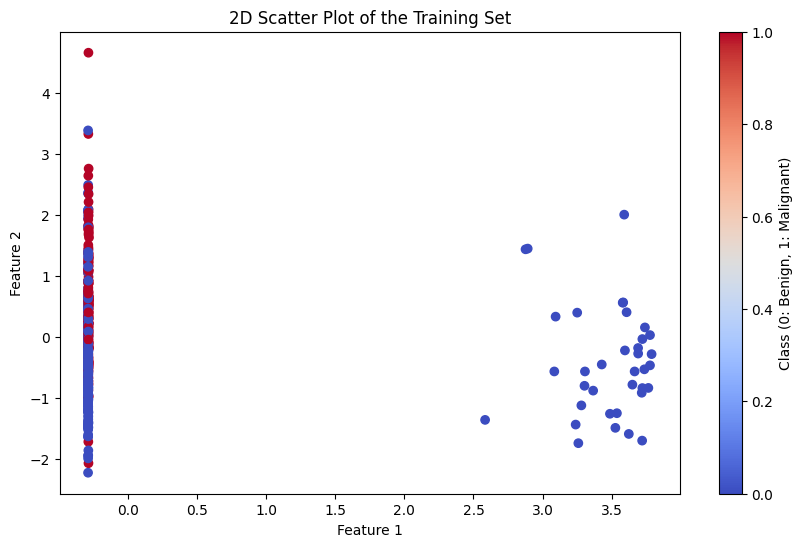

In [440]:
import matplotlib.pyplot as plt

# Select the first two features for a 2D scatter plot
X_train_2d = X_train.iloc[:, :2]  # Changed to select first two features

# Create a scatter plot of the first two features, with colors based on the target class
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_2d.iloc[:, 0], X_train_2d.iloc[:, 1], c=y_train, cmap='coolwarm', marker='o')

# Add labels for the axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add a color bar to show the class mapping (0 for Benign, 1 for Malignant)
plt.colorbar(scatter, label='Class (0: Benign, 1: Malignant)')

# Title of the plot
plt.title('2D Scatter Plot of the Training Set')

# Show the plot
plt.show()

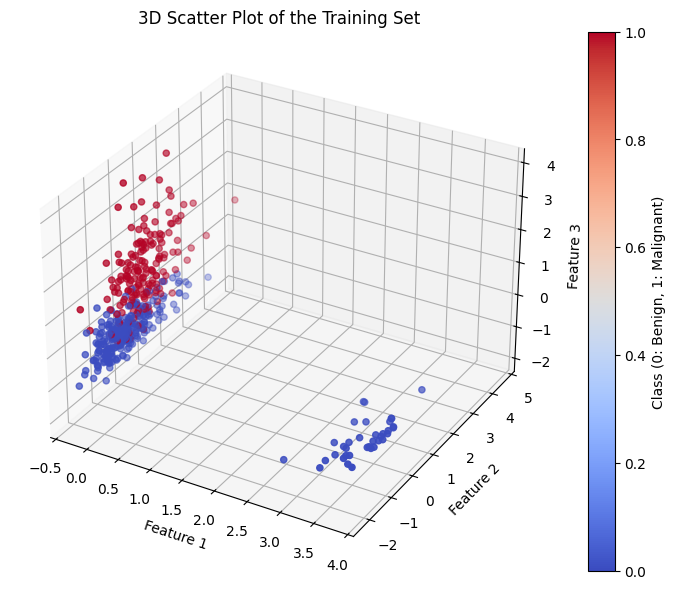

In [441]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Check if the dataset has more than 3 features
if X.shape[1] >= 3:
    X_train_3d = X_train.iloc[:, :5]  # Select the first 3 features for 3D plot
else:
    raise ValueError("The dataset doesn't have 3 or more features.")

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot: Plot the first 3 features with color based on target class
scatter = ax.scatter(X_train_3d.iloc[:, 0], X_train_3d.iloc[:, 1], X_train_3d.iloc[:, 2], c=y_train, cmap='coolwarm', marker='o')

# Labels for the axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Color bar showing class mapping
colorbar = plt.colorbar(scatter)
colorbar.set_label('Class (0: Benign, 1: Malignant)')

# Title of the plot
plt.title('3D Scatter Plot of the Training Set')

# Show the plot
plt.show()


# ***Initial Model Fittign***

Models: \

Logistic Regression\
Support Vector Machine (SVM)\
Random Forest\
k-Nearest Neighbors (kNN)





# ***Logistic Regression***

In [442]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the model
logisticRegression = LogisticRegression(random_state=42)
logisticRegression.fit(X_train, y_train)

# Make predictions
logisticRegression_y_pred = logisticRegression.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, logisticRegression_y_pred))
print(classification_report(y_test, logisticRegression_y_pred))

Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



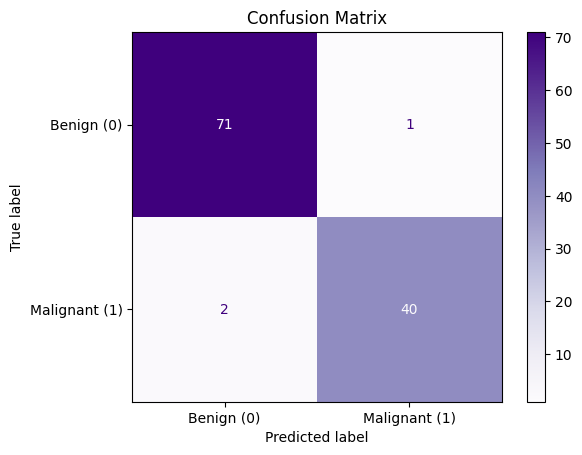

In [443]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, logisticRegression_y_pred)

# Plot the confusion matrix
cm_LR = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign (0)', 'Malignant (1)'])
cm_LR.plot(cmap='Purples')
plt.title('Confusion Matrix')
plt.show()



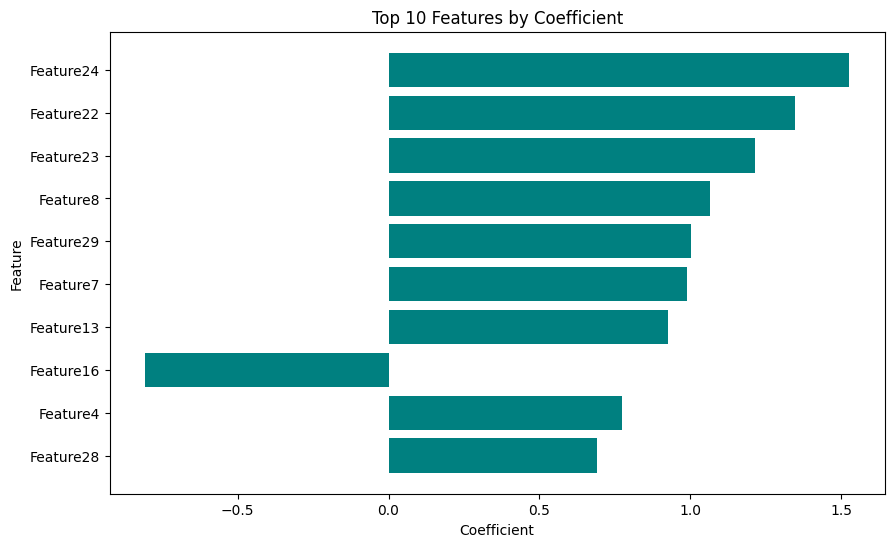

In [444]:
import pandas as pd
import numpy as np

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logisticRegression.coef_[0]
})

# Sort by absolute coefficient values
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the top features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], feature_importance['Coefficient'][:10], color='teal')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Features by Coefficient')
plt.gca().invert_yaxis()
plt.show()


In [445]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the decision boundary
def plot_decision_boundary(X, y, model):
    # Define the range for the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on the grid
    Z = logisticRegression.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training data
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.Paired)
    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


# Ensure X_train has two features
if X_train.shape[1] == 2:
    # Convert to NumPy array if needed
    X_train_2D = X_train.values if hasattr(X_train, 'values') else X_train
    y_train_array = y_train.values if hasattr(y_train, 'values') else y_train

    # Plot the decision boundary
    plot_decision_boundary(X_train_2D, y_train_array, logisticRegression)
else:
    print("The dataset has more than two features. Please reduce it to two features for visualization.")


The dataset has more than two features. Please reduce it to two features for visualization.


PCA + Logistic Regression Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



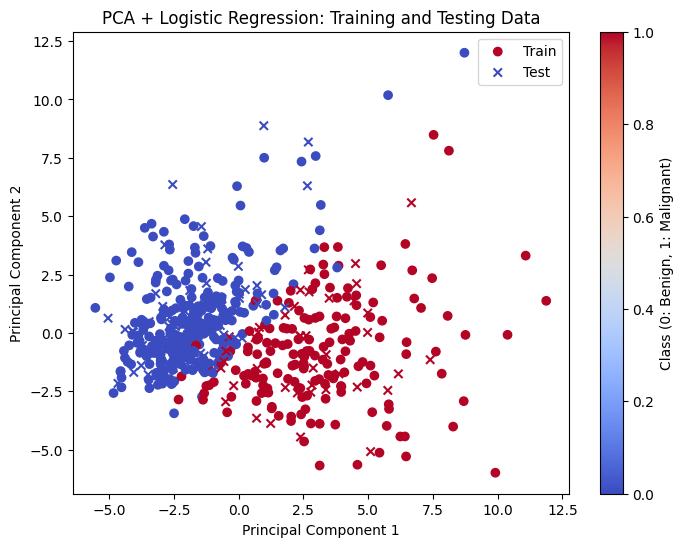

In [446]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Standardize the data (Important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 3: Train Logistic Regression with PCA-transformed data
logisticRegression = LogisticRegression(random_state=42)
logisticRegression.fit(X_train_pca, y_train)

# Step 4: Make predictions and evaluate the model
logisticRegression_y_pred_pca = logisticRegression.predict(X_test_pca)

# Step 5: Print accuracy and classification report
print("PCA + Logistic Regression Accuracy:", accuracy_score(y_test, logisticRegression_y_pred_pca))
print(classification_report(y_test, logisticRegression_y_pred_pca))

# Step 6: Visualize the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', marker='o', label="Train")
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', marker='x', label="Test")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class (0: Benign, 1: Malignant)')
plt.legend()
plt.title('PCA + Logistic Regression: Training and Testing Data')
plt.show()


LDA + Logistic Regression Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.95      0.98      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



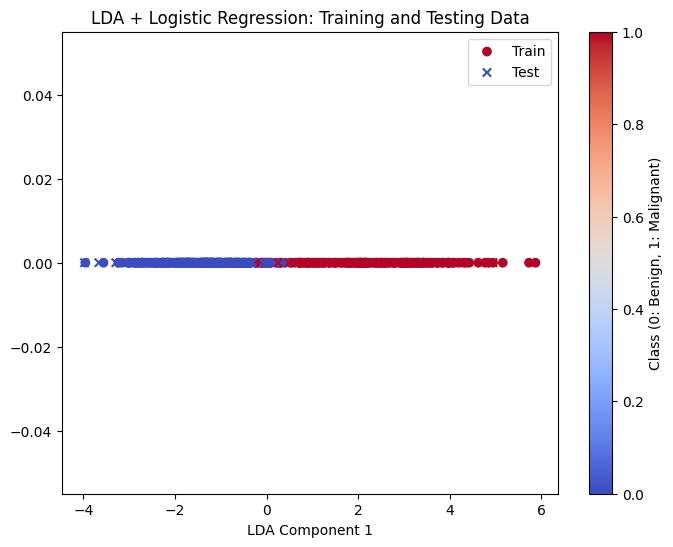

In [447]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Step 1: Apply LDA (reduce to 1 component since n_classes - 1 = 1)
lda = LinearDiscriminantAnalysis(n_components=1) # Changed n_components to 1
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Step 2: Train Logistic Regression with LDA-transformed data
logisticRegression.fit(X_train_lda, y_train)

# Step 3: Make predictions and evaluate the model
logisticRegression_y_pred_lda = logisticRegression.predict(X_test_lda)

# Step 4: Print accuracy and classification report
print("LDA + Logistic Regression Accuracy:", accuracy_score(y_test, logisticRegression_y_pred_lda))
print(classification_report(y_test, logisticRegression_y_pred_lda))

# Step 5: Visualize the LDA result
# Note: Since we have only 1 LDA component, we can't create a 2D scatter plot.
# You might consider visualizing the data in 1D or using a different visualization technique.
plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda[:, 0], [0] * len(X_train_lda), c=y_train, cmap='coolwarm', marker='o', label="Train") # Updated scatter plot for 1D visualization
plt.scatter(X_test_lda[:, 0], [0] * len(X_test_lda), c=y_test, cmap='coolwarm', marker='x', label="Test") # Updated scatter plot for 1D visualization
plt.xlabel('LDA Component 1')
#plt.ylabel('LDA Component 2')  # Remove ylabel as we only have 1 component
plt.colorbar(label='Class (0: Benign, 1: Malignant)')
plt.legend()
plt.title('LDA + Logistic Regression: Training and Testing Data')
plt.show()

# ***SVM***

In [448]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

# Train the SVM
SVM = SVC(kernel='linear', probability=True, random_state=42,class_weight='balanced')
SVM.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

SVM_y_pred = SVM.predict(X_test)
print("Accuracy:", accuracy_score(y_test, SVM_y_pred))
print("\nClassification Report:\n", classification_report(y_test, SVM_y_pred))


Accuracy: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



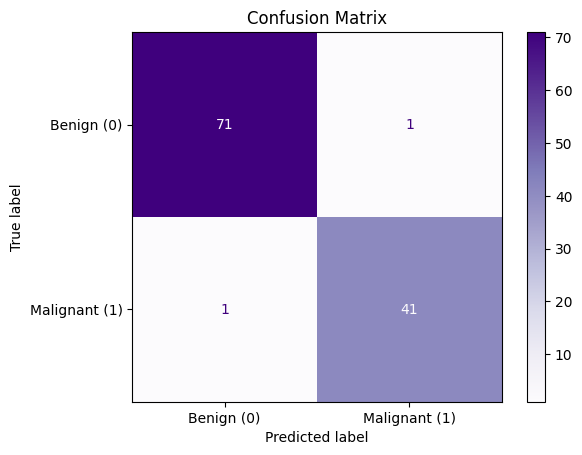

In [449]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, SVM_y_pred)

# Plot the confusion matrix
cm_SVM = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign (0)', 'Malignant (1)'])
cm_SVM.plot(cmap='Purples')
plt.title('Confusion Matrix')
plt.show()

In [450]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the decision boundary
def plot_decision_boundary(X, y, model):
    # Define the range for the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on the grid
    Z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training data
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.Paired)
    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


# Ensure X_train has two features
if X_train.shape[1] == 2:
    # Convert to NumPy array if needed
    X_train_2D = X_train.values if hasattr(X_train, 'values') else X_train
    y_train_array = y_train.values if hasattr(y_train, 'values') else y_train

    # Plot the decision boundary
    plot_decision_boundary(X_train_2D, y_train_array, SVM)
else:
    print("The dataset has more than two features. Please reduce it to two features for visualization.")


The dataset has more than two features. Please reduce it to two features for visualization.


PCA + SVM Accuracy: 0.9649122807017544

Classification Report (PCA + SVM):
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



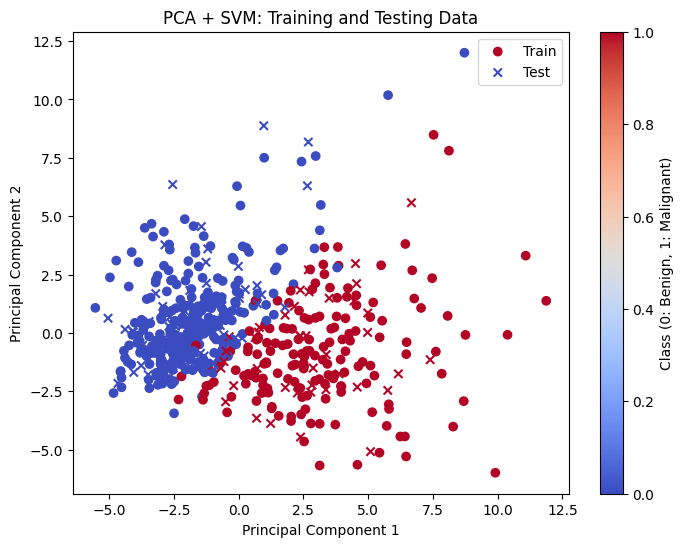

In [451]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Standardize the data (Important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 3: Train SVM with PCA-transformed data
SVM_pca = SVC(kernel='linear', probability=True, random_state=42)
SVM_pca.fit(X_train_pca, y_train)

# Step 4: Make predictions and evaluate the model
SVM_y_pred_pca = SVM_pca.predict(X_test_pca)

# Step 5: Print accuracy and classification report
print("PCA + SVM Accuracy:", accuracy_score(y_test, SVM_y_pred_pca))
print("\nClassification Report (PCA + SVM):\n", classification_report(y_test, SVM_y_pred_pca))

# Step 6: Visualize the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', marker='o', label="Train")
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', marker='x', label="Test")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class (0: Benign, 1: Malignant)')
plt.legend()
plt.title('PCA + SVM: Training and Testing Data')
plt.show()


# ***Random Forest***

In [452]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Train the Random Forest classifier
RF = RandomForestClassifier(n_estimators=4000, random_state=9)
RF.fit(X_train, y_train)

# Make predictions
RF_y_pred = RF.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, RF_y_pred))
print("\nClassification Report:\n", classification_report(y_test, RF_y_pred))


Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



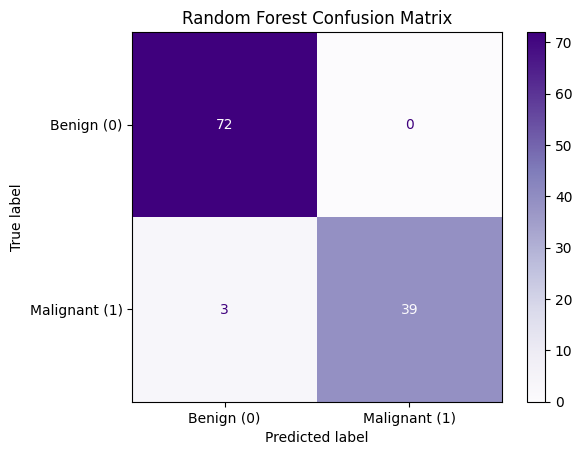

In [453]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, RF_y_pred)

# Plot the confusion matrix
cm_RF = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign (0)', 'Malignant (1)'])
cm_RF.plot(cmap='Purples')
plt.title('Random Forest Confusion Matrix')
plt.show()


In [454]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the decision boundary
def plot_decision_boundary(X, y, model):
    # Define the range for the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on the grid
    Z = RF.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training data
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.Paired)
    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


# Ensure X_train has two features
if X_train.shape[1] == 2:
    # Convert to NumPy array if needed
    X_train_2D = X_train.values if hasattr(X_train, 'values') else X_train
    y_train_array = y_train.values if hasattr(y_train, 'values') else y_train

    # Plot the decision boundary
    plot_decision_boundary(X_train_2D, y_train_array, RF)
else:
    print("The dataset has more than two features. Please reduce it to two features for visualization.")


The dataset has more than two features. Please reduce it to two features for visualization.


# ***kNN***

In [455]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Train KNN model
kNN = KNeighborsClassifier(n_neighbors=1)  # You can adjust n_neighbors
kNN.fit(X_train, y_train)

# Make predictions
kNN_y_pred = kNN.predict(X_test)  # Assuming you have X_test and y_test

# Evaluate KNN
print("Accuracy:", accuracy_score(y_test, kNN_y_pred))
print("\nClassification Report:\n", classification_report(y_test, kNN_y_pred))



Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



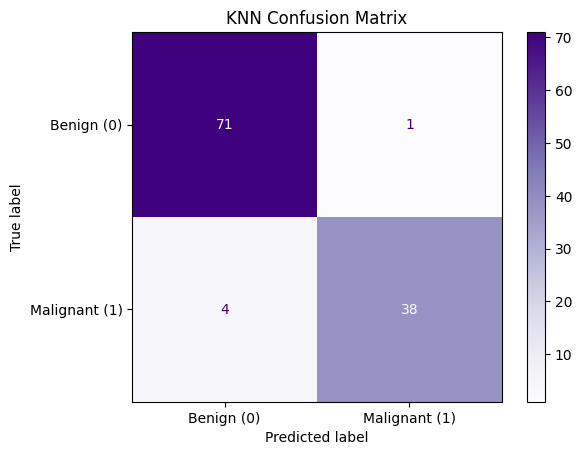

In [456]:
# Confusion Matrix for KNN
cm = confusion_matrix(y_test, kNN_y_pred)
cm_kNN = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign (0)', 'Malignant (1)'])
cm_kNN.plot(cmap='Purples')
plt.title("KNN Confusion Matrix")
plt.show()



In [457]:
# Function to plot Decision Boundary for KNN
def plot_decision_boundary_knn(X, y, model):
    # Define the range for the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training data
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.Paired)
    plt.title("KNN Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot Decision Boundary for KNN
if X.shape[1] == 2:
    plot_decision_boundary_knn(X, y, kNN)
else:
    print("The dataset has more than two features. Please reduce it to two features for visualization.")


The dataset has more than two features. Please reduce it to two features for visualization.


# ***Naive Bayes***

In [458]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Train Naive Bayes model
NB = GaussianNB()
NB.fit(X_train, y_train)

# Make predictions
NB_y_pred = NB.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, NB_y_pred))
print("\nClassification Report:\n", classification_report(y_test, NB_y_pred))

Accuracy: 0.9298245614035088

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95        72
           1       0.93      0.88      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



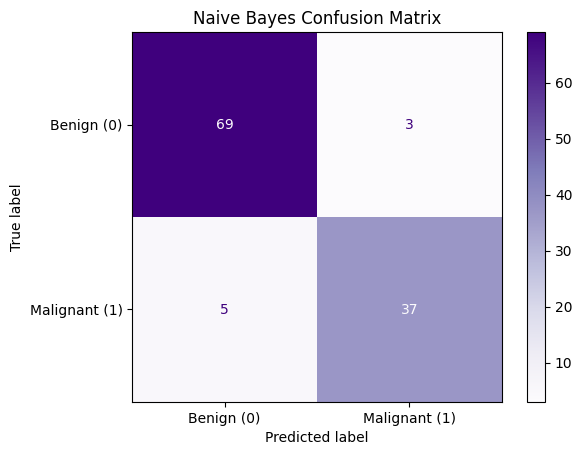

In [459]:
# Confusion Matrix for Naive Bayes
cm = confusion_matrix(y_test, NB_y_pred)
cm_NB = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign (0)', 'Malignant (1)'])
cm_NB.plot(cmap='Purples')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# ***Gradient Boosting***

In [460]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Train Gradient Boosting model
GB = GradientBoostingClassifier(n_estimators=100, random_state=42)
GB.fit(X_train, y_train)

# Make predictions
GB_y_pred = GB.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, GB_y_pred))
print("\nClassification Report:\n", classification_report(y_test, GB_y_pred))

Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



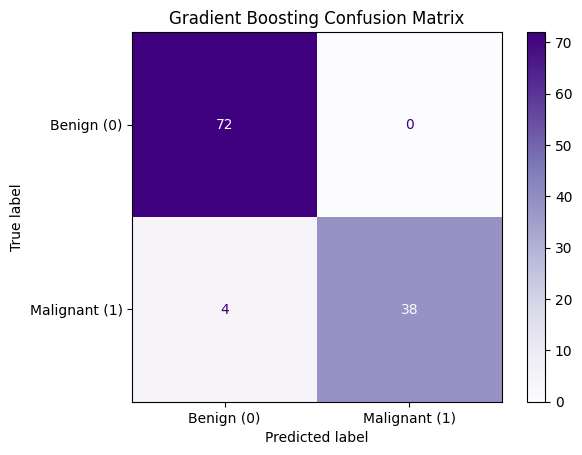

In [461]:
# Confusion Matrix for Gradient Boosting
cm = confusion_matrix(y_test, GB_y_pred)
cm_GB = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign (0)', 'Malignant (1)'])
cm_GB.plot(cmap='Purples')
plt.title("Gradient Boosting Confusion Matrix")
plt.show()


# ***Neural Networks (MLPClassifier)***

In [462]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Train Neural Network (MLPClassifier) model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=43)
nn_model.fit(X_train, y_train)

# Make predictions
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))



Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



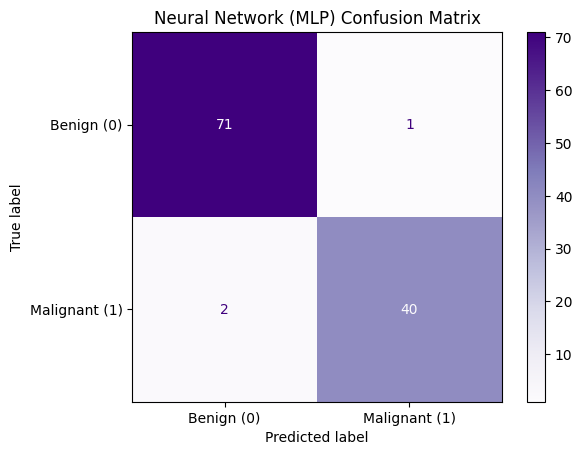

In [463]:
# Confusion Matrix for Neural Network
cm_nn = confusion_matrix(y_test, y_pred_nn)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=['Benign (0)', 'Malignant (1)'])
disp_nn.plot(cmap='Purples')
plt.title("Neural Network (MLP) Confusion Matrix")
plt.show()


# ***Manual Testing to see Results.***

In [464]:
# Filter the dataset to include only benign cases
benign_cases = data[data['Diagnosis'] == 0]

# Randomly sample 20 benign cases
random_benign_sample = benign_cases.sample(n=20, random_state=6)

# Separate features and target for these cases
X_random_benign = random_benign_sample.iloc[:, 1:]  # Features
y_random_benign = random_benign_sample['Diagnosis']  # Actual labels (all 0)

# Predict using the trained Random Forest model
y_random_benign_pred = kNN.predict(X_random_benign)

# Print results
print("Actual Labels (all should be 0):", y_random_benign.values)
print("Predicted Labels:", y_random_benign_pred)

print("--------------------------------------")

# Filter the dataset to include only benign cases
m_cases = data[data['Diagnosis'] == 1]

# Randomly sample 20 benign cases
random_m_sample = m_cases.sample(n=20, random_state=6)

# Separate features and target for these cases
X_random_m = random_m_sample.iloc[:, 1:]  # Features
y_random_m = random_m_sample['Diagnosis']  # Actual labels (all 0)

# Predict using the trained Random Forest model
y_random_m_pred = kNN.predict(X_random_m)

# Print results
print("Actual Labels (all should be 1):", y_random_m.values)
print("Predicted Labels:", y_random_m_pred)

print("--------------------------------------")


Actual Labels (all should be 0): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
--------------------------------------
Actual Labels (all should be 1): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted Labels: [1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
--------------------------------------


# ***Additions for later optimizations***

In [465]:
!pip install shap
!pip install lime
!pip install matplotlib scikit-learn


***Lime***

In [466]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer

# Train a Random Forest Classifier (as an example)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Choose an instance to explain (from the test set)
instance_to_explain = X_test.iloc[0].values.reshape(1, -1)  # First instance in the test set
true_label = y_test.iloc[0]

# Create LIME Explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X.columns,
    class_names=['Benign', 'Malignant'],
    mode='classification'
)

# Explain the prediction
explanation = explainer.explain_instance(
    data_row=instance_to_explain[0],
    predict_fn=clf.predict_proba
)

# Visualize the explanation
explanation.show_in_notebook()
explanation.as_list()  # Feature contributions


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[('Feature24 <= -0.64', -0.1060957595559306),
 ('-0.77 < Feature28 <= -0.21', -0.058675605096263454),
 ('Feature23 <= -0.69', -0.05332389121053266),
 ('Feature2 <= -0.69', -0.04637550618548549),
 ('Feature22 <= -0.68', -0.04522748066001743),
 ('Feature25 > 0.62', 0.037492722401431804),
 ('Feature3 <= -0.69', -0.030249322257169586),
 ('-0.74 < Feature7 <= -0.37', -0.029850917646486636),
 ('Feature21 <= -0.18', -0.029470232940875796),
 ('Feature4 <= -0.67', -0.029157437624581724)]

***SHAP***

In [467]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Create a SHAP Explainer
# The 'check_additivity' argument is no longer needed, and setting
# approximate=True can help with additivity issues in some cases.
# If issues persist, check for data transformations and ensure
# X_test is preprocessed in the same way as X_train during model training.
explainer = shap.Explainer(clf, X_train, approximate=True)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Visualize SHAP values for a single instance (local explanation)
shap.initjs()  # Initialize JavaScript visualization in Jupyter Notebook
shap.force_plot(
    explainer.expected_value[1], shap_values[1][0], X_test.iloc[0]
)  # Explanation for the first instance

# Visualize SHAP summary plot (global explanation)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Visualize SHAP dependence plot for a single feature
shap.dependence_plot(
    "mean radius", shap_values[1], X_test
)  # Replace "mean radius" with your feature of interest

ValueError: visualize() can only display Explanation objects (or arrays of them)!

t-SNE

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE for dimensionality reduction to 2D
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne_model.fit_transform(X)

# Visualize the results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7
)
plt.colorbar(scatter, label='Diagnosis (0: B, 1: M)')
plt.title('t-SNE Visualization of Classes')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

PDP

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
import matplotlib.pyplot as plt

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature names (assuming X_train is a pandas DataFrame)
feature_names = X_train.columns

# Generate Partial Dependence for a single feature
# Use the actual column name from feature_names, e.g., feature_names[0]
feature_to_plot = feature_names[0]  # Replace with the desired feature index
display = PartialDependenceDisplay.from_estimator(
    clf, X_train, [feature_to_plot], grid_resolution=50, kind="average",
    feature_names=feature_names # Pass feature_names explicitly
)
plt.show()

# Generate Partial Dependence for two features (interaction plot)
# Use actual column names from feature_names
features_to_plot = [feature_names[0], feature_names[1]]  # Replace with desired feature indices
display = PartialDependenceDisplay.from_estimator(
    clf, X_train, [features_to_plot], grid_resolution=50, kind="average",
    feature_names=feature_names # Pass feature_names explicitly
)
plt.show()

# ***Hyperparameter Tuning***

# ***Cross Validation***

# ***Dimensionality Reduction***